# Building a Logistic Regression

## Import the relevant libraries

In [2]:
import numpy as np
import itertools
import statsmodels.api as sm
import pandas as pd
import seaborn
seaborn.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# data['y'] = data['y'].map({'yes':1,'no':0})
clean_data = data.drop(['User ID', 'Gender', 'Age'], axis=1)
one_ctr = (data['Purchased'] == 1).sum()
zero_ctr = (data['Purchased'] == 0).sum()
print(f'one ctr = {one_ctr}, zero_ctr = {zero_ctr}')

one ctr = 143, zero_ctr = 257


In [5]:
x1 = clean_data['EstimatedSalary']
y = clean_data['Purchased']

### Declare the dependent and independent variables

In [6]:
x = sm.add_constant(x1)

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [7]:
reg_log = sm.Logit(y,x)
res = reg_log.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.584658
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Mar 2022   Pseudo R-squ.:                  0.1032
Time:                        11:41:02   Log-Likelihood:                -233.86
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 2.168e-13
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.3227      0.286     -8.134      0.000      -2.882      -1.763
EstimatedSalary  2.387e-05   3.52e-06      6.790      0.000     1.7e-05    3.08e-05
===================================================================================
"""

In [8]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [9]:
cm = confusion_matrix(x, y, res)
cm[0]

array([[246.,  11.],
       [ 79.,  64.]])

In [10]:
def plot_conf_matrix(
    cm,
        classes,
        title = 'Confusion Matrix',
        cmap=plt.cm.Blues
):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

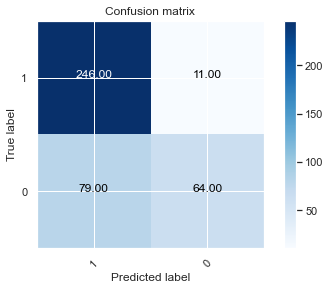

In [11]:
plot_conf_matrix(cm[0], classes=['1','0'],  title='Confusion matrix')